#### Problem Statement (In Short)
<p style="font-size:medium">
A US bike-sharing provider <b>BoomBikes</b> has recently suffered considerable dips in their revenues due to the ongoing <b>Corona pandemic</b>. It has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

A consulting company is being contracted to <u>understand the factors on which the demand for these shared bikes depends</u>. <br>
Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 
<br>
The company wants to know:
<ol>
<li>Which variables are significant in predicting the demand for shared bikes.</li>
<li>How well those variables describe the bike demands</li>
</ol>
<h4>Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. </h4>
</p>

#### Business Goal
<p style="font-size:medium">
You are required to model the demand for shared bikes with the available independent variables. </br>
It will be used by the management to understand how exactly the demands vary with different features. </br>
They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. </br>
Further, the model will be a good way for management to understand the demand dynamics of a new market. 


</p>

##### Step 1: Reading and Understanding Data.

In [1041]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1042]:
dsBikeSharing=pd.read_csv('day.csv')
dsBikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Step 1.1: EDA.

In [1043]:
### Data Types
dsBikeSharing.dtypes
#Except dteday all other variables are numerical types (int32, float64)


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

##### Step 1.1.1: EDA - Check for Missing Values and Handle if any 

In [1044]:
nullcolumns =pd.DataFrame(100.0*dsBikeSharing.isnull().sum()/len(dsBikeSharing))
nullcolumns=nullcolumns.reset_index()
nullcolumns.columns=["column name","null_percentage"]
nullcolumns[nullcolumns["null_percentage"]>0]

,column name,null_percentage


<b> As observed above there are no columns with missing values

##### Step 1.1.2: EDA - Outlier Analysis through boxplots and removal of outliers if any 

<b> User Defined Function to Generate Box blots

In [1045]:
import seaborn as sns
def drawboxplots(_suptitle,_dataSource,_xcolumnsList,_yColumn=None,_hueColumn=None, figsizeX=10, figsizeY=10,rows=3,cols=3,_orient='v'):
    plt.figure(figsize=(figsizeX, figsizeY))
    f,axes=plt.subplots(rows,cols)
    rowIndex=0
    columnIndex=0
    for _column in _xcolumnsList:
        sns.boxplot(x=_column, data=_dataSource,y=_yColumn,hue=_hueColumn, orient=_orient, ax=axes[rowIndex][columnIndex])
        columnIndex=columnIndex+1
        if columnIndex>(cols-1):
            columnIndex=0
            rowIndex=rowIndex+1
        if rowIndex>(rows-1):
           break 


    f.tight_layout()
    f.suptitle(_suptitle)
    f.subplots_adjust(top=0.88)
    plt.show()   



<Figure size 1000x1000 with 0 Axes>

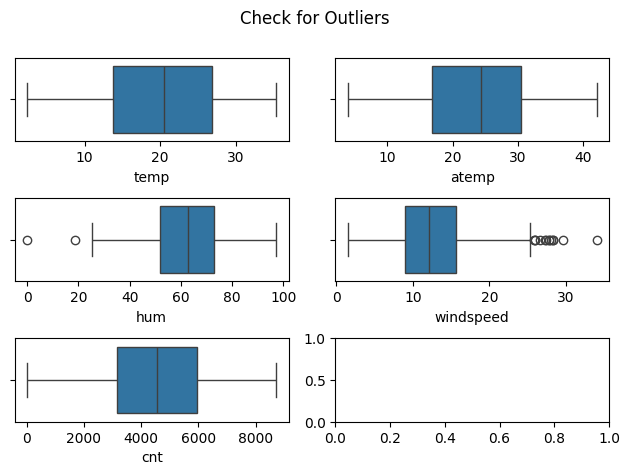

In [1046]:
lstNumericalColumns=["temp","atemp","hum","windspeed","cnt"]
drawboxplots("Check for Outliers",dsBikeSharing,lstNumericalColumns,rows=3,cols=2)

<ol>
<li>"windspeed" seems to having 1 data point above IQR_max (~29)
</ol>
<b>Removing Outliers below:</b>

In [1047]:
dsBikeSharing=dsBikeSharing[dsBikeSharing["windspeed"]<=29.584]


<b>Box plot after Removing Outliers below:</b>

<Figure size 1000x1000 with 0 Axes>

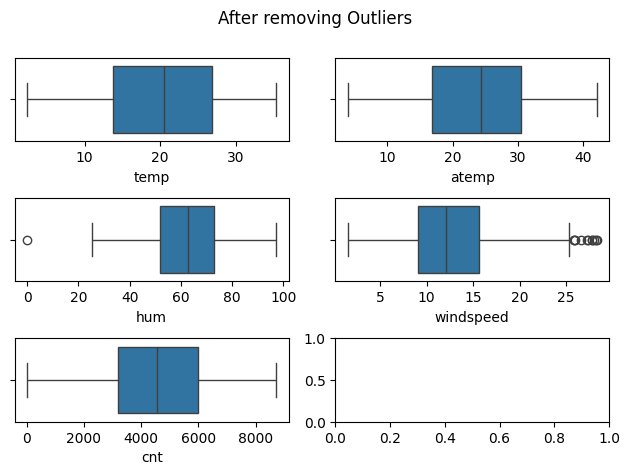

In [1048]:
lstNumericalColumns=["temp","atemp","hum","windspeed","cnt"]
drawboxplots("After removing Outliers",dsBikeSharing,lstNumericalColumns,rows=3,cols=2)

##### Step 2: Visualising the Data for Linear Regression Analysis

##### Step 2.2: Visualising Numeric Variables

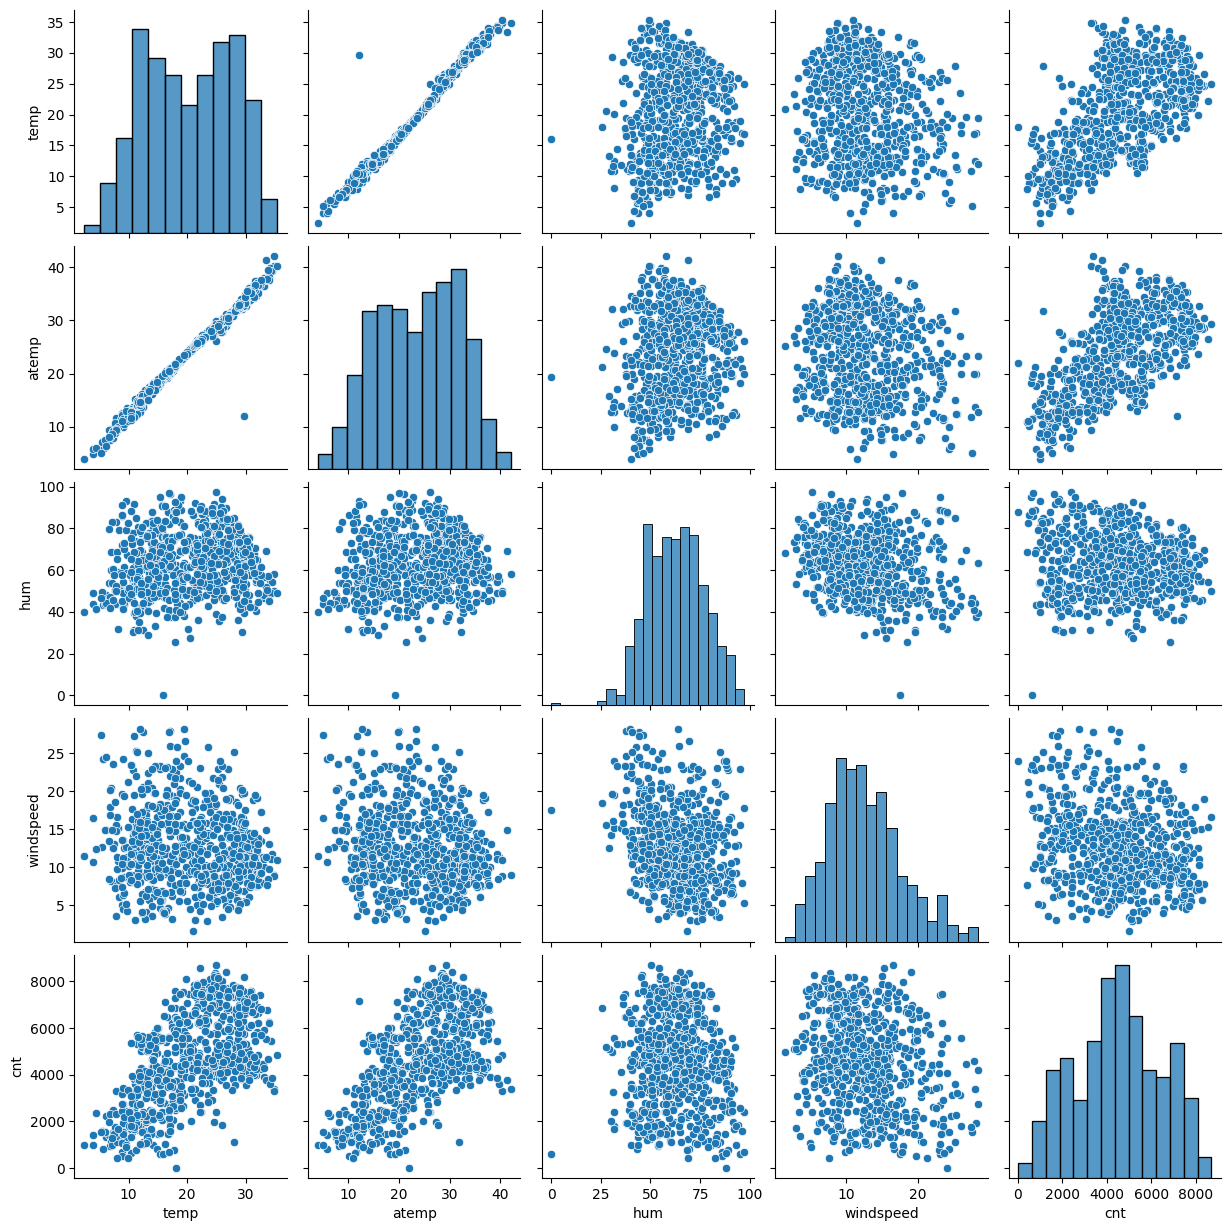

In [1049]:
lstNumericalColumns=["temp","atemp","hum","windspeed","cnt"]
dsBikeSharing_Numeric=dsBikeSharing[lstNumericalColumns]
sns.pairplot(dsBikeSharing_Numeric)
plt.show()

##### Step 2.2: Visualising Categorical Variables

##### Step 2.2.3: Formatting dteday and calculating Year(dteday) to visualize the data by year category

In [1050]:
from datetime import datetime

dsBikeSharing['dteday_formatted']=dsBikeSharing["dteday"].apply(lambda x: datetime.strptime(x,'%d/%m/%Y').strftime('%Y-%m-%d') if "/" in x else x)
dsBikeSharing["dte_year"]=pd.DatetimeIndex(dsBikeSharing['dteday_formatted']).year
dsBikeSharing["dte_month"]=pd.DatetimeIndex(dsBikeSharing['dteday_formatted']).month




##### Step 2.2.4: Creating text based values

In [1051]:
def getSeasonText(x):
    seasons=["1-spring","2-summer","3-fall","4-winter"]
    return seasons[x-1]

def getWeekdayText(x):
    weekdays=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
    return weekdays[x-1]

def getWeatherSituationText(x):
    #+ weathersit : 
	#	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	#	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	#	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	#	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    weathersituations=["1-Cloudy","2-Misty","3-Light_Rain_Snow","4-Heavy_Rain_Snow"]
    return weathersituations[x-1]



dsBikeSharing["season_text"]=dsBikeSharing["season"].apply(lambda x: getSeasonText(x))
dsBikeSharing["weekday_text"]=dsBikeSharing["weekday"].apply(lambda x: getWeekdayText(x))
dsBikeSharing["weathersituation_text"]=dsBikeSharing["weathersit"].apply(lambda x: getWeatherSituationText(x))


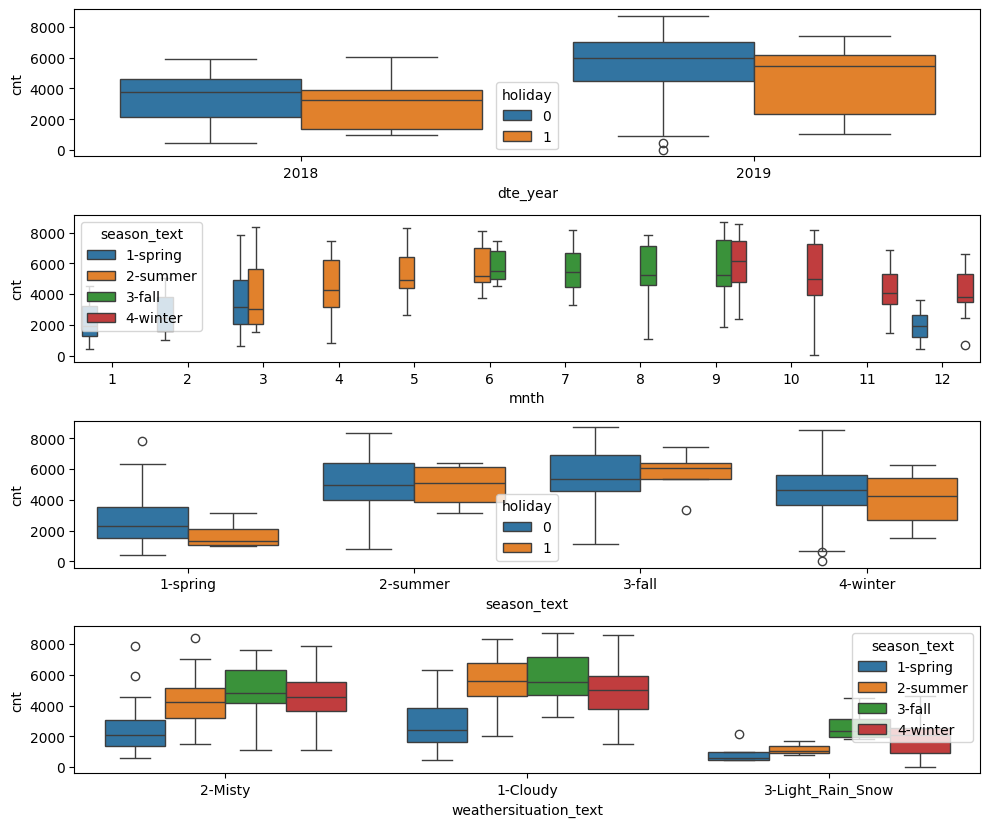

In [1052]:
lstCategoryColumns=["dte_year","dte_month","weekday_text","season_text"]
plt.figure(figsize=(10,10))
plt.subplot(5,1,1)
sns.boxplot(x='dte_year',y='cnt',hue="holiday",data=dsBikeSharing)
plt.subplot(5,1,2)
sns.boxplot(x='mnth',y='cnt',hue="season_text",data=dsBikeSharing)
plt.subplot(5,1,3)
sns.boxplot(x='season_text',y='cnt',hue="holiday",data=dsBikeSharing)
plt.subplot(5,1,4)
sns.boxplot(x='weathersituation_text',y='cnt',hue="season_text",data=dsBikeSharing)
plt.tight_layout()
plt.show()


<b>Category Analysis : Observations</b>
<ol>
<li>Year vs Holiday vs usage : Non Holiday i.e., Weekday has more usage then Holidays</li>
<li>Month vs Season vs usage : With Sep as an exception overall Fall has more usage </li>
<li>Season vs Holiday vs usage : "Fall", followed by "Summer" has more usage especially on Holidays </li>
<li>Weather Situation vs Season vs usage :<br> a. Overall "Fall" has more usage especially across all situations.<br>
b. Cloudy Situation has more usage followed by Misty and LightRain_Snow
 </li>

<li><b>Please Note:As expected, No usage on HeavyRain and Snow situations.</b></li>



</ol>

##### Step 3: Data Preparation

##### Step 3.1: Dummy Variables

In [1053]:
season_dummy = pd.get_dummies(dsBikeSharing['season_text'],drop_first=True)
season_dummy.head()

,2-summer,3-fall,4-winter
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [1054]:
weathersit_dummy = pd.get_dummies(dsBikeSharing['weathersituation_text'],drop_first=True)
weathersit_dummy.head()

,2-Misty,3-Light_Rain_Snow
0,True,False
1,True,False
2,False,False
3,False,False
4,False,False


In [1055]:
dsBikeSharing = pd.concat([dsBikeSharing, season_dummy], axis = 1)
dsBikeSharing = pd.concat([dsBikeSharing, weathersit_dummy], axis = 1)

#dsBikeSharing.to_csv('day_season.csv')
dsBikeSharing.drop(['season_text'], axis = 1, inplace = True,errors='ignore')
dsBikeSharing.drop(['season'], axis = 1, inplace = True,errors='ignore')
dsBikeSharing.drop(['weathersituation_text'], axis = 1, inplace = True,errors='ignore')
dsBikeSharing.drop(['weathersit'], axis = 1, inplace = True,errors='ignore')
dsBikeSharing.describe()




,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,dte_year,dte_month
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,365.842033,0.500000,6.537088,0.028846,2.995879,0.689560,20.322893,23.728591,62.833841,12.711343,850.184066,3660.568681,4510.752747,2018.500000,6.530220
std,210.827853,0.500344,3.448381,0.167489,2.000340,0.462992,7.515460,8.159526,14.161650,5.104778,687.190104,1558.347368,1935.469028,0.500344,3.450442
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,2018.000000,1.000000
25%,183.750000,0.000000,4.000000,0.000000,1.000000,0.000000,13.794799,16.881400,52.000000,9.031466,315.750000,2504.750000,3183.250000,2018.000000,4.000000
50%,365.500000,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.708350,12.125057,722.000000,3664.500000,4548.500000,2018.500000,7.000000
75%,548.250000,1.000000,10.000000,0.000000,5.000000,1.000000,26.889153,30.477187,73.010425,15.624735,1097.750000,4769.750000,5978.500000,2019.000000,10.000000
max,730.000000,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,28.292425,3410.000000,6946.000000,8714.000000,2019.000000,12.000000


In [1056]:
dsBikeSharing.head()
dsBikeSharing.columns


Index(['instant', 'dteday', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'dteday_formatted', 'dte_year', 'dte_month', 'weekday_text', '2-summer',
       '3-fall', '4-winter', '2-Misty', '3-Light_Rain_Snow'],
      dtype='object')

<b>Remove unwanted columns before split</b>

In [1057]:
dropcolumns=["instant","dteday","dteday_formatted","weekday_text","casual","registered","dte_year","dte_month"]

dsBikeSharing.drop(dropcolumns,axis=1,errors='ignore',inplace=True)


In [1058]:
dsBikeSharing=dsBikeSharing.astype(float)
dsBikeSharing.head()
dsBikeSharing.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', '2-summer', '3-fall', '4-winter', '2-Misty',
       '3-Light_Rain_Snow'],
      dtype='object')

## Step 4: Splitting the Data into Training and Testing Sets

In [1059]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
dfBikeSharing_train, dfBikeSharing_test = train_test_split(dsBikeSharing, train_size = 0.7, test_size = 0.3, random_state = 100)

<b>Step 4.1 Rescaling Features</b>

In [1060]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_variables=['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', '2-summer', '3-fall', '4-winter', '2-Misty',
       '3-Light_Rain_Snow']

#numerical_variables=["temp","atemp","hum","windspeed","cnt","spring","summer",	"winter",	"Light_Rain_Snow","Misty","cnt","yr","mnth","weekday","holiday"]


dfBikeSharing_train[numerical_variables] = scaler.fit_transform(dfBikeSharing_train[numerical_variables])
dfBikeSharing_train.head()
dfBikeSharing_train.columns



Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', '2-summer', '3-fall', '4-winter', '2-Misty',
       '3-Light_Rain_Snow'],
      dtype='object')

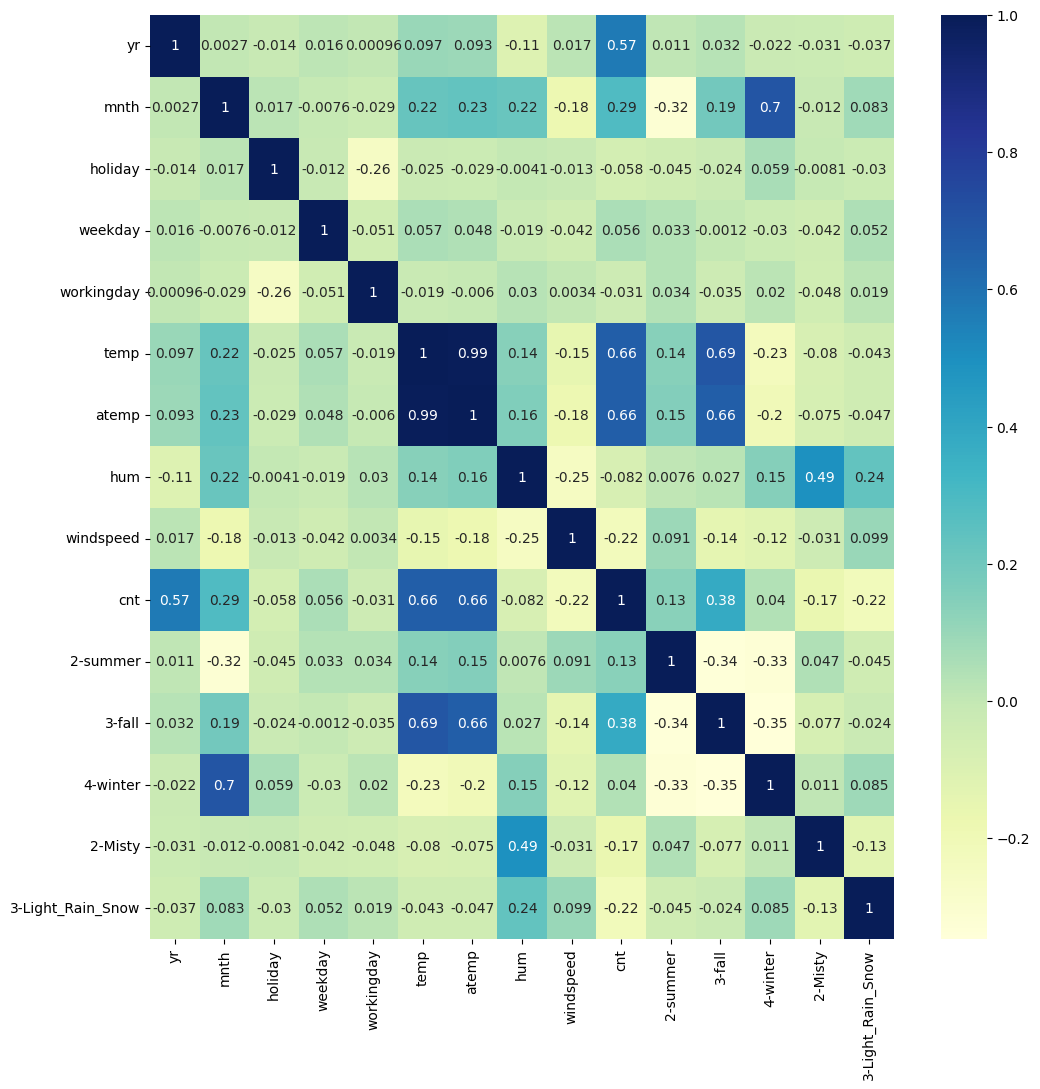

In [1061]:
plt.figure(figsize = (12, 12))
sns.heatmap(dfBikeSharing_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 5: Building a linear model

<b>Step 5.1 Dividing into X and Y sets for the model building</b>

In [1062]:
dfBikeSharing_train.columns
y_train = dfBikeSharing_train.pop('cnt')
X_train = dfBikeSharing_train


<b>Step 5.2 Adding all the Variables</b>

In [1063]:
import statsmodels.api as sm
X_train=X_train.astype(float)
X_train_lm = sm.add_constant(X_train)
lrBikeSharing_All_1 = sm.OLS(y_train, X_train_lm.astype(float)).fit()
lrBikeSharing_All_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     167.9
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          1.78e-177
Time:                        00:28:46   Log-Likelihood:                 486.53
No. Observations:                 509   AIC:                            -943.1
Df Residuals:                     494   BIC:                            -879.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2162      0.029      7.458      0.000       0.159       0.273
yr                    0.2232      0.009     26.183      0.000       0.206       0.240
mnth                 -0.0060      0.026     -0.235      0.814      -0.056       0.044
holiday              -0.0808      0.026     -3.140      0.002      -0.131      -0.030
weekday               0.0121      0.013      0.961      0.337      -0.013       0.037
workingday           -0.0211      0.009     -2.240      0.026      -0.040      -0.003
temp                  0.4152      0.141      2.938      0.003       0.138       0.693
atemp                 0.0847      0.139      0.610      0.542      -0.188       0.357
hum                  -0.1472      0.038     -3.864      0.000      -0.222      -0.072
windspeed            -0.1287      0.023     -5.720      0.000      -0.173      -0.085
2-summer              0.1223      0.016      7.546      0.000       0.090       0.154
3-fall                0.0953      0.024      4.032      0.000       0.049       0.142
4-winter              0.1720      0.022      7.719      0.000       0.128       0.216
2-Misty              -0.0411      0.011     -3.739      0.000      -0.063      -0.020
3-Light_Rain_Snow    -0.2224      0.028     -8.056      0.000      -0.277      -0.168
==============================================================================
Omnibus:                       80.577   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.619
Skew:                          -0.805   Prob(JB):                     1.66e-44
Kurtosis:                       5.630   Cond. No.                         91.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> Variables with p-value >0.05
- mnth=0.814
- atemp=0.542
- weekday=0.337



<b>Step 5.2 Checking VIF</b><br>
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

- Global variable to store columns removed

In [1064]:
removed_columns=[]

getVIF(_X_train) #<b>User Defined Function to get  VIF values of current train model</b> 

In [1065]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def getVIF(_X_train):
    vif = pd.DataFrame()
    vif['Features'] = _X_train.columns
    vif['VIF'] = [variance_inflation_factor(_X_train.values, i) for i in range(_X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif['OutSideLimit?']=vif['VIF']>5
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [1066]:
getVIF(X_train)

,Features,VIF,OutSideLimit?
5,temp,385.01,True
6,atemp,367.95,True
7,hum,18.16,True
1,mnth,13.36,True
10,3-fall,8.30,True
11,4-winter,7.17,True
8,windspeed,3.91,False
9,2-summer,3.65,False
4,workingday,3.31,False
3,weekday,3.10,False


<b>Step 5.3 Dropping the variable and updating the model</b><br>
- Removing Variables in recommended (as per the class) order of Precedence</p>
- High p-value and High VIF
- High-Low
    - High p-value, low VIF , followed-by
    - Low p-value, High VIF , followed-by
- low p-value and low VIF

dropVariableandFitNew() #<b>User Defined Function to remove and Rebuild Model</b> 

In [1067]:
def dropVariableandFitNew(_X_train,_y_train, dropVariableName,newmodelvariableName):
    _X = _X_train.drop(dropVariableName, axis=1)
    _X_train_lm = sm.add_constant(_X)
    globals()[newmodelvariableName] = sm.OLS(_y_train, _X_train_lm).fit()
    return _X,_X_train_lm


<b>Step 5.3.1 Removing variable 'mnth' p-value=0.814 from lrBikeSharing_All_1 and rebuild to get new Model : lrBikeSharing_All_2</b>

In [1068]:
curent_column_removed='mnth'
removed_columns.append(curent_column_removed)
X,X_train_lm=dropVariableandFitNew(X_train,y_train,curent_column_removed,'lrBikeSharing_All_2')
lrBikeSharing_All_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.2
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          1.33e-178
Time:                        00:28:47   Log-Likelihood:                 486.50
No. Observations:                 509   AIC:                            -945.0
Df Residuals:                     495   BIC:                            -885.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2156      0.029      7.469      0.000       0.159       0.272
yr                    0.2231      0.009     26.208      0.000       0.206       0.240
holiday              -0.0805      0.026     -3.135      0.002      -0.131      -0.030
weekday               0.0121      0.013      0.956      0.340      -0.013       0.037
workingday           -0.0209      0.009     -2.231      0.026      -0.039      -0.002
temp                  0.4148      0.141      2.939      0.003       0.137       0.692
atemp                 0.0850      0.139      0.614      0.540      -0.187       0.357
hum                  -0.1482      0.038     -3.918      0.000      -0.222      -0.074
windspeed            -0.1289      0.022     -5.733      0.000      -0.173      -0.085
2-summer              0.1214      0.016      7.700      0.000       0.090       0.152
3-fall                0.0928      0.021      4.410      0.000       0.051       0.134
4-winter              0.1678      0.013     12.598      0.000       0.142       0.194
2-Misty              -0.0410      0.011     -3.736      0.000      -0.063      -0.019
3-Light_Rain_Snow    -0.2224      0.028     -8.064      0.000      -0.277      -0.168
==============================================================================
Omnibus:                       80.754   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.663
Skew:                          -0.807   Prob(JB):                     1.62e-44
Kurtosis:                       5.628   Cond. No.                         88.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> Variables with p-value >0.05
- atemp=0.54
- weekday=0.34


In [1069]:
getVIF(X_train)

,Features,VIF,OutSideLimit?
5,temp,385.01,True
6,atemp,367.95,True
7,hum,18.16,True
1,mnth,13.36,True
10,3-fall,8.30,True
11,4-winter,7.17,True
8,windspeed,3.91,False
9,2-summer,3.65,False
4,workingday,3.31,False
3,weekday,3.10,False


<b>Step 5.3.2 Removing variable 'atemp' p-value=0.54 from lrBikeSharing_All_2 and rebuild to get new Model : lrBikeSharing_All_3</b>

In [1070]:
current_column_removed='atemp'
removed_columns.append(current_column_removed)
X,X_train_lm=dropVariableandFitNew(X,y_train,current_column_removed,'lrBikeSharing_All_3')
lrBikeSharing_All_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.5
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          1.12e-179
Time:                        00:28:47   Log-Likelihood:                 486.31
No. Observations:                 509   AIC:                            -946.6
Df Residuals:                     496   BIC:                            -891.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2167      0.029      7.524      0.000       0.160       0.273
yr                    0.2231      0.009     26.218      0.000       0.206       0.240
holiday              -0.0809      0.026     -3.154      0.002      -0.131      -0.031
weekday               0.0115      0.013      0.916      0.360      -0.013       0.036
workingday           -0.0205      0.009     -2.196      0.029      -0.039      -0.002
temp                  0.4988      0.034     14.493      0.000       0.431       0.566
hum                  -0.1469      0.038     -3.893      0.000      -0.221      -0.073
windspeed            -0.1316      0.022     -5.982      0.000      -0.175      -0.088
2-summer              0.1217      0.016      7.723      0.000       0.091       0.153
3-fall                0.0915      0.021      4.374      0.000       0.050       0.133
4-winter              0.1684      0.013     12.687      0.000       0.142       0.195
2-Misty              -0.0411      0.011     -3.750      0.000      -0.063      -0.020
3-Light_Rain_Snow    -0.2229      0.028     -8.091      0.000      -0.277      -0.169
==============================================================================
Omnibus:                       78.903   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.286
Skew:                          -0.789   Prob(JB):                     1.45e-43
Kurtosis:                       5.610   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> Variables with p-value >0.05
- weekday=0.36


In [1071]:
getVIF(X)

,Features,VIF,OutSideLimit?
4,temp,22.32,True
5,hum,16.76,True
8,3-fall,6.54,True
6,windspeed,3.73,False
7,2-summer,3.46,False
3,workingday,3.28,False
2,weekday,3.08,False
9,4-winter,2.55,False
10,2-Misty,2.24,False
0,yr,2.02,False


<b>Step 5.3.3 Removing variable 'weekday' p-value=0.36 from lrBikeSharing_All_3 and rebuild to get new Model : lrBikeSharing_All_4</b>


In [1072]:
curent_column_removed='weekday'
removed_columns.append(curent_column_removed)
X,X_train_lm=dropVariableandFitNew(X,y_train,curent_column_removed,'lrBikeSharing_All_4')
lrBikeSharing_All_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.3
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          1.13e-180
Time:                        00:28:47   Log-Likelihood:                 485.88
No. Observations:                 509   AIC:                            -947.8
Df Residuals:                     497   BIC:                            -897.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2234      0.028      8.022      0.000       0.169       0.278
yr                    0.2231      0.009     26.224      0.000       0.206       0.240
holiday              -0.0815      0.026     -3.176      0.002      -0.132      -0.031
workingday           -0.0210      0.009     -2.249      0.025      -0.039      -0.003
temp                  0.5016      0.034     14.635      0.000       0.434       0.569
hum                  -0.1484      0.038     -3.935      0.000      -0.222      -0.074
windspeed            -0.1329      0.022     -6.052      0.000      -0.176      -0.090
2-summer              0.1211      0.016      7.695      0.000       0.090       0.152
3-fall                0.0900      0.021      4.316      0.000       0.049       0.131
4-winter              0.1678      0.013     12.658      0.000       0.142       0.194
2-Misty              -0.0412      0.011     -3.754      0.000      -0.063      -0.020
3-Light_Rain_Snow    -0.2212      0.027     -8.048      0.000      -0.275      -0.167
==============================================================================
Omnibus:                       81.795   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.126
Skew:                          -0.822   Prob(JB):                     2.12e-44
Kurtosis:                       5.604   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> !No variables with p>0.05!</b><br>
<b>Focus on Variables with VIF>5 to remove MultiCollinearity and rebuilding the model</b>

In [1073]:
getVIF(X)

,Features,VIF,OutSideLimit?
3,temp,21.90,True
4,hum,15.93,True
7,3-fall,6.48,True
5,windspeed,3.69,False
6,2-summer,3.45,False
2,workingday,3.28,False
8,4-winter,2.55,False
9,2-Misty,2.23,False
0,yr,2.02,False
10,3-Light_Rain_Snow,1.17,False


<b>Step 5.3.4 Removing variable 'temp' VIF=21.9 and rebuild to get lrBikeSharing_All_5 model</b>

In [1074]:
current_column_removed='temp'
removed_columns.append(current_column_removed)
X,X_train_lm=dropVariableandFitNew(X,y_train,current_column_removed,'lrBikeSharing_All_5')
lrBikeSharing_All_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     150.1
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          2.78e-143
Time:                        00:28:48   Log-Likelihood:                 394.68
No. Observations:                 509   AIC:                            -767.4
Df Residuals:                     498   BIC:                            -720.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3016      0.033      9.234      0.000       0.237       0.366
yr                    0.2406      0.010     23.908      0.000       0.221       0.260
holiday              -0.0808      0.031     -2.635      0.009      -0.141      -0.021
workingday           -0.0254      0.011     -2.277      0.023      -0.047      -0.003
hum                  -0.0321      0.044     -0.729      0.467      -0.119       0.054
windspeed            -0.1300      0.026     -4.953      0.000      -0.182      -0.078
2-summer              0.2678      0.015     18.457      0.000       0.239       0.296
3-fall                0.3374      0.015     23.115      0.000       0.309       0.366
4-winter              0.2384      0.015     16.167      0.000       0.209       0.267
2-Misty              -0.0694      0.013     -5.376      0.000      -0.095      -0.044
3-Light_Rain_Snow    -0.2666      0.033     -8.169      0.000      -0.331      -0.202
==============================================================================
Omnibus:                       33.382   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.789
Skew:                          -0.398   Prob(JB):                     5.18e-15
Kurtosis:                       4.571   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1075]:
getVIF(X)

,Features,VIF,OutSideLimit?
3,hum,11.11,True
4,windspeed,3.62,False
2,workingday,3.28,False
7,4-winter,2.18,False
6,3-fall,2.17,False
8,2-Misty,2.09,False
5,2-summer,2.03,False
0,yr,1.95,False
9,3-Light_Rain_Snow,1.14,False
1,holiday,1.10,False


<b>Step 5.3.5 Removing variable 'hum' VIF=11.1 and rebuild to get lrBikeSharing_All_5 model</b>

In [1076]:
current_column_removed='hum'
removed_columns.append(current_column_removed)
X,X_train_lm=dropVariableandFitNew(X,y_train,current_column_removed,'lrBikeSharing_All_6')
lrBikeSharing_All_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     166.9
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          2.72e-144
Time:                        00:28:48   Log-Likelihood:                 394.41
No. Observations:                 509   AIC:                            -768.8
Df Residuals:                     499   BIC:                            -726.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2819      0.018     15.352      0.000       0.246       0.318
yr                    0.2414      0.010     24.121      0.000       0.222       0.261
holiday              -0.0813      0.031     -2.654      0.008      -0.141      -0.021
workingday           -0.0259      0.011     -2.332      0.020      -0.048      -0.004
windspeed            -0.1245      0.025     -4.955      0.000      -0.174      -0.075
2-summer              0.2664      0.014     18.539      0.000       0.238       0.295
3-fall                0.3358      0.014     23.302      0.000       0.307       0.364
4-winter              0.2365      0.014     16.317      0.000       0.208       0.265
2-Misty              -0.0747      0.011     -7.065      0.000      -0.096      -0.054
3-Light_Rain_Snow    -0.2757      0.030     -9.159      0.000      -0.335      -0.217
==============================================================================
Omnibus:                       33.420   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.480
Skew:                          -0.401   Prob(JB):                     6.04e-15
Kurtosis:                       4.564   Cond. No.                         9.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1077]:
getVIF(X)

,Features,VIF,OutSideLimit?
3,windspeed,3.04,False
2,workingday,2.75,False
0,yr,1.90,False
4,2-summer,1.69,False
6,4-winter,1.63,False
5,3-fall,1.58,False
7,2-Misty,1.48,False
1,holiday,1.08,False
8,3-Light_Rain_Snow,1.07,False


<b>At this point are variables are within the expected p-value and VIF range, so we proceed with Residual Analysis

## Step 6: Residual Analysis

In [1078]:
y_train_cnt = lrBikeSharing_All_6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

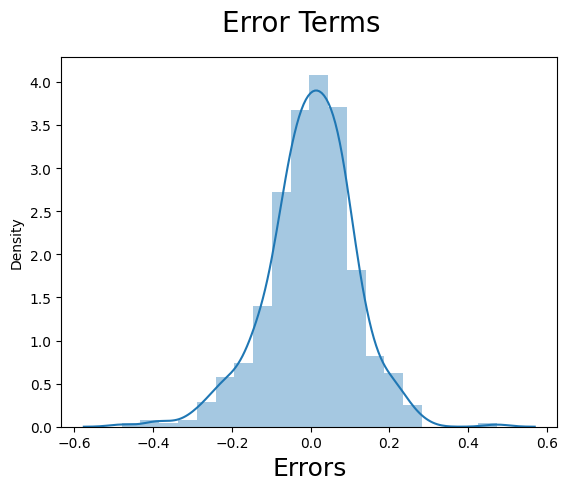

In [1079]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<b>Residual is Normally distributed with Mean=0, so we proceed to make predictions</b>

## Step 7: Making Predictions Using the Final Model


<b>Apply scaler Transform on the Test Model</b>

In [1080]:

numerical_variables=['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', '2-summer', '3-fall', '4-winter', '2-Misty',
       '3-Light_Rain_Snow']
dfBikeSharing_test[numerical_variables] = scaler.transform(dfBikeSharing_test[numerical_variables])

In [1081]:
dfBikeSharing_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,2-summer,3-fall,4-winter,2-Misty,3-Light_Rain_Snow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.484018,0.490245,0.027397,0.496195,0.707763,0.564925,0.568007,0.648720,0.384696,0.523010,0.273973,0.251142,0.223744,0.296804,0.027397
std,0.500889,0.305523,0.163612,0.328498,0.455833,0.228933,0.226726,0.137619,0.187738,0.221189,0.447017,0.434663,0.417707,0.457896,0.163612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.027237,0.323377,-0.052405,0.055683,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.379165,0.385403,0.544372,0.247113,0.375748,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.574266,0.594695,0.636364,0.356772,0.519903,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.765846,0.745195,0.744739,0.488513,0.685918,1.000000,0.500000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.983385,1.049574,1.010390,0.988507,0.981707,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [1082]:
y_test = dfBikeSharing_test.pop('cnt')
X_test = dfBikeSharing_test

In [1083]:
X_test_m4 = sm.add_constant(X_test)
X_test_m4.columns

Index(['const', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', '2-summer', '3-fall', '4-winter',
       '2-Misty', '3-Light_Rain_Snow'],
      dtype='object')

In [1084]:
X_test_m4.columns

Index(['const', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', '2-summer', '3-fall', '4-winter',
       '2-Misty', '3-Light_Rain_Snow'],
      dtype='object')

In [1085]:
removed_columns

['mnth', 'atemp', 'weekday', 'temp', 'hum']

In [1086]:
#X_test_m4.shape
X_test_m4.drop(removed_columns,axis=1,inplace=True,errors='ignore')
y_pred_m4 = lrBikeSharing_All_6.predict(X_test_m4)

In [1087]:
from sklearn.metrics import r2_score

In [1088]:
print(r2_score(y_true=y_test,y_pred=y_pred_m4))

0.7627597675865608


<b style='color:blue'> Predicted R Squared = 0.7627597675865608 , which is close to 1 and this seems to be a Good Fit

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

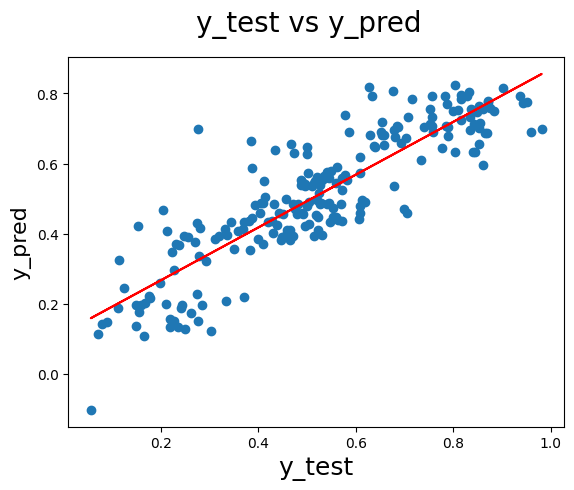

In [1089]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
m, b= np.polyfit(y_test, y_pred_m4,1)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  
plt.plot(y_test, m*y_test+b, color='red') 

<b>Equation of the Best fitted Line using Manual Method</b>

<b style='color:blue'>$usage = 0.2819+ yr * 0.2414+ holiday*-0.0813+ workingday*-0.0259+ windspeed*-0.1245+ 2-summer * 0.2664+3-fall*0.3358+ 4-winter*0.2365+2-Misty*-0.0747+3-Light_Rain_Snow*-0.2757</b>


## Using RFE - Recursive feature elimination : 

In [1090]:
dsBikeSharing_RFE=pd.read_csv('day.csv')

In [1091]:
dsBikeSharing_RFE.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1092]:
dsBikeSharing_RFE["season_text"]=dsBikeSharing_RFE["season"].apply(lambda x: getSeasonText(x))
dsBikeSharing_RFE["weathersituation_text"]=dsBikeSharing_RFE["weathersit"].apply(lambda x: getWeatherSituationText(x))

In [1093]:
season_dummy_RFE = pd.get_dummies(dsBikeSharing_RFE['season_text'],drop_first=True)
season_dummy_RFE=season_dummy_RFE.astype(float)
season_dummy_RFE.head()

,2-summer,3-fall,4-winter
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [1094]:
weathersit_dummy_RFE = pd.get_dummies(dsBikeSharing_RFE['weathersituation_text'],drop_first=True)
weathersit_dummy_RFE=weathersit_dummy_RFE.astype(float)
weathersit_dummy_RFE.head()


,2-Misty,3-Light_Rain_Snow
0,1.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [1095]:
dsBikeSharing_RFE = pd.concat([dsBikeSharing_RFE, season_dummy_RFE], axis = 1)
dsBikeSharing_RFE = pd.concat([dsBikeSharing_RFE, weathersit_dummy_RFE], axis = 1)
dsBikeSharing_RFE.drop(['season'], axis = 1, inplace = True,errors='ignore')
dsBikeSharing_RFE.drop(['season_text'], axis = 1, inplace = True,errors='ignore')
dsBikeSharing_RFE.drop(['weathersit'], axis = 1, inplace = True,errors='ignore')
dsBikeSharing_RFE.drop(['weathersituation_text'], axis = 1, inplace = True,errors='ignore')
dsBikeSharing_RFE


,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,2-summer,3-fall,4-winter,2-Misty,3-Light_Rain_Snow
0,1,01-01-2018,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,0.0,0.0,0.0,1.0,0.0
1,2,02-01-2018,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,0.0,0.0,0.0,1.0,0.0
2,3,03-01-2018,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0.0,0.0,0.0,0.0,0.0
3,4,04-01-2018,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0.0,0.0,0.0,0.0,0.0
4,5,05-01-2018,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,12,0,5,1,10.420847,11.33210,65.2917,23.458911,247,1867,2114,0.0,0.0,0.0,1.0,0.0
726,727,28-12-2019,1,12,0,6,0,10.386653,12.75230,59.0000,10.416557,644,2451,3095,0.0,0.0,0.0,1.0,0.0
727,728,29-12-2019,1,12,0,0,0,10.386653,12.12000,75.2917,8.333661,159,1182,1341,0.0,0.0,0.0,1.0,0.0
728,729,30-12-2019,1,12,0,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,0.0,0.0,0.0,0.0,0.0


In [1096]:
dropcolumns=["instant","dteday","dteday_formatted","weekday_text","casual","registered","dte_year","dte_month"]
dsBikeSharing_RFE.drop(dropcolumns,axis=1,errors='ignore',inplace=True)

In [1097]:
dsBikeSharing_RFE=dsBikeSharing_RFE.astype(float)

In [1098]:
dsBikeSharing_RFE.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', '2-summer', '3-fall', '4-winter', '2-Misty',
       '3-Light_Rain_Snow'],
      dtype='object')

In [1099]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
dfBikeSharing_train_rfe, dfBikeSharing_test_rfe = train_test_split(dsBikeSharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1101]:
numerical_variables=['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', '2-summer', '3-fall', '4-winter', '2-Misty',
       '3-Light_Rain_Snow']
nFeatures=len(numerical_variables)
dfBikeSharing_train_rfe[numerical_variables] = scaler.fit_transform(dfBikeSharing_train_rfe[numerical_variables])
dfBikeSharing_train_rfe.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,2-summer,3-fall,4-winter,2-Misty,3-Light_Rain_Snow
728,1.0,1.000000,0.0,0.166667,1.0,0.245101,0.210280,0.502164,0.811772,0.204096,0.0,0.0,0.0,0.0,0.0
481,1.0,0.272727,0.0,1.000000,0.0,0.496388,0.514667,0.416450,0.803559,0.714565,1.0,0.0,0.0,0.0,0.0
112,0.0,0.272727,0.0,0.166667,1.0,0.499503,0.511200,0.922511,0.495882,0.461804,1.0,0.0,0.0,1.0,0.0
629,1.0,0.727273,0.0,0.000000,0.0,0.736253,0.732139,0.671862,0.634993,0.963300,0.0,1.0,0.0,0.0,0.0
535,1.0,0.454545,0.0,0.666667,1.0,0.901354,0.884358,0.615151,0.188193,0.712034,1.0,0.0,0.0,0.0,0.0


### Dividing into X and Y sets for the model building

In [1102]:
y_train_new = dfBikeSharing_train_rfe.pop('cnt')
X_train_new = dfBikeSharing_train_rfe

## Building model using RFE


In [1103]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1104]:
lm = LinearRegression()
lm.fit(X_train_new, y_train_new)

rfe = RFE(lm, n_features_to_select=nFeatures)             # running RFE
rfe = rfe.fit(X_train_new, y_train_new)

In [1105]:
list(zip(X_train_new.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('2-summer', True, 1),
 ('3-fall', True, 1),
 ('4-winter', True, 1),
 ('2-Misty', True, 1),
 ('3-Light_Rain_Snow', True, 1)]

In [1106]:
col = X_train_new.columns[rfe.support_]
col

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', '2-summer', '3-fall', '4-winter', '2-Misty',
       '3-Light_Rain_Snow'],
      dtype='object')

In [1107]:
X_train_new.columns[~rfe.support_]

Index([], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [1108]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train_new[col]

In [1109]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1110]:
lrBikeSharing_All_RFE_1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [1111]:
lrBikeSharing_All_RFE_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     167.9
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          1.78e-177
Time:                        00:28:57   Log-Likelihood:                 486.53
No. Observations:                 509   AIC:                            -943.1
Df Residuals:                     494   BIC:                            -879.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2162      0.029      7.458      0.000       0.159       0.273
yr                    0.2232      0.009     26.183      0.000       0.206       0.240
mnth                 -0.0060      0.026     -0.235      0.814      -0.056       0.044
holiday              -0.0808      0.026     -3.140      0.002      -0.131      -0.030
weekday               0.0121      0.013      0.961      0.337      -0.013       0.037
workingday           -0.0211      0.009     -2.240      0.026      -0.040      -0.003
temp                  0.4152      0.141      2.938      0.003       0.138       0.693
atemp                 0.0847      0.139      0.610      0.542      -0.188       0.357
hum                  -0.1472      0.038     -3.864      0.000      -0.222      -0.072
windspeed            -0.1287      0.023     -5.720      0.000      -0.173      -0.085
2-summer              0.1223      0.016      7.546      0.000       0.090       0.154
3-fall                0.0953      0.024      4.032      0.000       0.049       0.142
4-winter              0.1720      0.022      7.719      0.000       0.128       0.216
2-Misty              -0.0411      0.011     -3.739      0.000      -0.063      -0.020
3-Light_Rain_Snow    -0.2224      0.028     -8.056      0.000      -0.277      -0.168
==============================================================================
Omnibus:                       80.577   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.619
Skew:                          -0.805   Prob(JB):                     1.66e-44
Kurtosis:                       5.630   Cond. No.                         91.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> Variables with p-value >0.05
- mnth=0.814
- atemp=0.542
- weekday=0.337



In [1112]:
import statsmodels.api as sm  
removed_columns_RFE=[]
removed_columns_RFE.append('mnth')
X_train_rfe.drop('mnth', axis = 1,inplace=True)

X_train_lm_new = sm.add_constant(X_train_rfe)
lrBikeSharing_All_RFE_2=sm.OLS(y_train_new,X_train_lm_new).fit()
lrBikeSharing_All_RFE_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.2
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          1.33e-178
Time:                        00:28:58   Log-Likelihood:                 486.50
No. Observations:                 509   AIC:                            -945.0
Df Residuals:                     495   BIC:                            -885.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2156      0.029      7.469      0.000       0.159       0.272
yr                    0.2231      0.009     26.208      0.000       0.206       0.240
holiday              -0.0805      0.026     -3.135      0.002      -0.131      -0.030
weekday               0.0121      0.013      0.956      0.340      -0.013       0.037
workingday           -0.0209      0.009     -2.231      0.026      -0.039      -0.002
temp                  0.4148      0.141      2.939      0.003       0.137       0.692
atemp                 0.0850      0.139      0.614      0.540      -0.187       0.357
hum                  -0.1482      0.038     -3.918      0.000      -0.222      -0.074
windspeed            -0.1289      0.022     -5.733      0.000      -0.173      -0.085
2-summer              0.1214      0.016      7.700      0.000       0.090       0.152
3-fall                0.0928      0.021      4.410      0.000       0.051       0.134
4-winter              0.1678      0.013     12.598      0.000       0.142       0.194
2-Misty              -0.0410      0.011     -3.736      0.000      -0.063      -0.019
3-Light_Rain_Snow    -0.2224      0.028     -8.064      0.000      -0.277      -0.168
==============================================================================
Omnibus:                       80.754   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.663
Skew:                          -0.807   Prob(JB):                     1.62e-44
Kurtosis:                       5.628   Cond. No.                         88.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> Variables with p-value >0.05
- atemp=0.54
- weekday=0.34

In [1113]:
removed_columns_RFE.append('atemp')
X_train_rfe.drop('atemp', axis = 1,inplace=True)

X_train_lm_new = sm.add_constant(X_train_rfe)
lrBikeSharing_All_RFE_3=sm.OLS(y_train_new,X_train_lm_new).fit()
lrBikeSharing_All_RFE_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.5
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          1.12e-179
Time:                        00:28:59   Log-Likelihood:                 486.31
No. Observations:                 509   AIC:                            -946.6
Df Residuals:                     496   BIC:                            -891.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2167      0.029      7.524      0.000       0.160       0.273
yr                    0.2231      0.009     26.218      0.000       0.206       0.240
holiday              -0.0809      0.026     -3.154      0.002      -0.131      -0.031
weekday               0.0115      0.013      0.916      0.360      -0.013       0.036
workingday           -0.0205      0.009     -2.196      0.029      -0.039      -0.002
temp                  0.4988      0.034     14.493      0.000       0.431       0.566
hum                  -0.1469      0.038     -3.893      0.000      -0.221      -0.073
windspeed            -0.1316      0.022     -5.982      0.000      -0.175      -0.088
2-summer              0.1217      0.016      7.723      0.000       0.091       0.153
3-fall                0.0915      0.021      4.374      0.000       0.050       0.133
4-winter              0.1684      0.013     12.687      0.000       0.142       0.195
2-Misty              -0.0411      0.011     -3.750      0.000      -0.063      -0.020
3-Light_Rain_Snow    -0.2229      0.028     -8.091      0.000      -0.277      -0.169
==============================================================================
Omnibus:                       78.903   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.286
Skew:                          -0.789   Prob(JB):                     1.45e-43
Kurtosis:                       5.610   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> Variables with p-value >0.05
- weekday=0.36

In [1114]:
removed_columns_RFE.append('weekday')
X_train_rfe.drop('weekday', axis = 1,inplace=True)

X_train_lm_new = sm.add_constant(X_train_rfe)
lrBikeSharing_All_RFE_4=sm.OLS(y_train_new,X_train_lm_new).fit()
lrBikeSharing_All_RFE_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.3
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          1.13e-180
Time:                        00:28:59   Log-Likelihood:                 485.88
No. Observations:                 509   AIC:                            -947.8
Df Residuals:                     497   BIC:                            -897.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2234      0.028      8.022      0.000       0.169       0.278
yr                    0.2231      0.009     26.224      0.000       0.206       0.240
holiday              -0.0815      0.026     -3.176      0.002      -0.132      -0.031
workingday           -0.0210      0.009     -2.249      0.025      -0.039      -0.003
temp                  0.5016      0.034     14.635      0.000       0.434       0.569
hum                  -0.1484      0.038     -3.935      0.000      -0.222      -0.074
windspeed            -0.1329      0.022     -6.052      0.000      -0.176      -0.090
2-summer              0.1211      0.016      7.695      0.000       0.090       0.152
3-fall                0.0900      0.021      4.316      0.000       0.049       0.131
4-winter              0.1678      0.013     12.658      0.000       0.142       0.194
2-Misty              -0.0412      0.011     -3.754      0.000      -0.063      -0.020
3-Light_Rain_Snow    -0.2212      0.027     -8.048      0.000      -0.275      -0.167
==============================================================================
Omnibus:                       81.795   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.126
Skew:                          -0.822   Prob(JB):                     2.12e-44
Kurtosis:                       5.604   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1115]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       '2-summer', '3-fall', '4-winter', '2-Misty', '3-Light_Rain_Snow'],
      dtype='object')

In [1116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_new = X_train_rfe
vif['Features'] = X_new.columns
vif['VIF'] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif['Outside Limit?']=vif['VIF']>5
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF,Outside Limit?
0,const,44.42,True
8,3-fall,4.81,False
4,temp,3.48,False
7,2-summer,2.62,False
9,4-winter,1.90,False
5,hum,1.86,False
10,2-Misty,1.58,False
11,3-Light_Rain_Snow,1.24,False
6,windspeed,1.17,False
2,holiday,1.08,False


In [1117]:
X_train_rfe.drop(["const"], axis = 1,inplace=True)

X_train_lm_new = sm.add_constant(X_train_rfe)
lrBikeSharing_All_RFE_5=sm.OLS(y_train_new,X_train_lm_new).fit()
lrBikeSharing_All_RFE_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.3
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          1.13e-180
Time:                        00:28:59   Log-Likelihood:                 485.88
No. Observations:                 509   AIC:                            -947.8
Df Residuals:                     497   BIC:                            -897.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2234      0.028      8.022      0.000       0.169       0.278
yr                    0.2231      0.009     26.224      0.000       0.206       0.240
holiday              -0.0815      0.026     -3.176      0.002      -0.132      -0.031
workingday           -0.0210      0.009     -2.249      0.025      -0.039      -0.003
temp                  0.5016      0.034     14.635      0.000       0.434       0.569
hum                  -0.1484      0.038     -3.935      0.000      -0.222      -0.074
windspeed            -0.1329      0.022     -6.052      0.000      -0.176      -0.090
2-summer              0.1211      0.016      7.695      0.000       0.090       0.152
3-fall                0.0900      0.021      4.316      0.000       0.049       0.131
4-winter              0.1678      0.013     12.658      0.000       0.142       0.194
2-Misty              -0.0412      0.011     -3.754      0.000      -0.063      -0.020
3-Light_Rain_Snow    -0.2212      0.027     -8.048      0.000      -0.275      -0.167
==============================================================================
Omnibus:                       81.795   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.126
Skew:                          -0.822   Prob(JB):                     2.12e-44
Kurtosis:                       5.604   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual Analysis of the train data


In [1118]:
y_train_cnt_new = lrBikeSharing_All_RFE_5.predict(X_train_lm_new)

Text(0.5, 0, 'Errors')

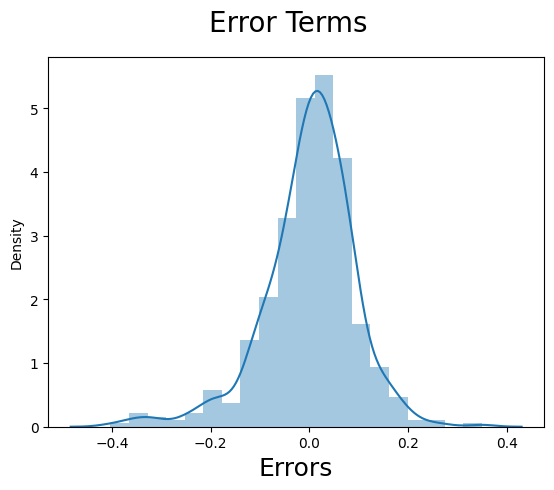

In [1119]:
fig = plt.figure()
sns.distplot((y_train_new - y_train_cnt_new), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions after using RFE

In [1120]:
dfBikeSharing_test_rfe [numerical_variables] = scaler.transform(dfBikeSharing_test_rfe[numerical_variables])

#### Dividing into X_test and y_test

In [1121]:
y_test_new = dfBikeSharing_test_rfe.pop('cnt')
X_test_new = dfBikeSharing_test_rfe

In [1122]:
X_test_new = X_test_new[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1123]:
y_pred_cnt_new = lrBikeSharing_All_RFE_5.predict(X_test_new)

In [1124]:
from sklearn.metrics import r2_score
r2_score(y_test_new, y_pred_cnt_new)

0.8138605169856202

- <b style='color:green'>R Squared value using RFE = 0.8138605169856202

## RFE:Model Evaluation

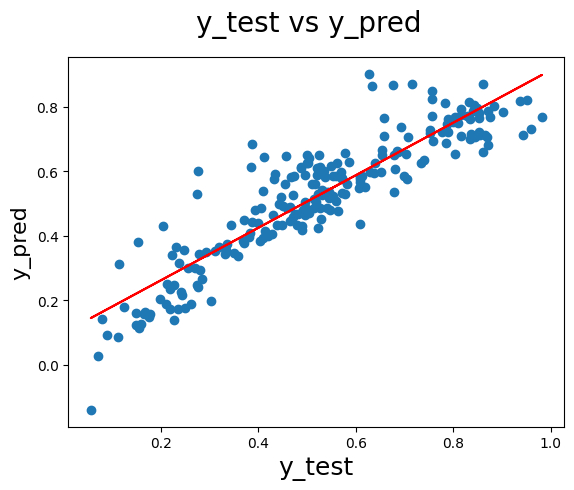

In [1125]:
fig = plt.figure()
plt.scatter(y_test_new,y_pred_cnt_new)
m, b= np.polyfit(y_test_new, y_pred_cnt_new,1)

fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

plt.plot(y_test_new, m*y_test_new+b, color='red') 

<b>RFE Method :Equation of the Best fitted line

<b style='color:green'>$ usage =0.2234+yr * 0.2231 + holiday * -0.0815 + workingday * -0.021 + temp * 0.5016 + hum * -0.1484 + windspeed * -0.1329 + 2-summer *0.1211+ 3-fall * 0.09+ 4-winter * 0.1678+ 2-Misty * -0.0412 + 3-Light_Rain_Snow * -0.2212
</b>



<b> Comparing below the Equation of best fitted line obtained through manual method

<b style='color:blue'>$usage = 0.2819+ yr * 0.2414+ holiday*-0.0813+ workingday*-0.0259+ windspeed*-0.1245+ 2-summer * 0.2664+3-fall * 0.3358+ 4-winter * 0.2365+2-Misty * -0.0747+3-Light_Rain_Snow * -0.2757</b>


- <b style='color:green'>R Squared value using RFE = 0.8138605169856202
- <b style='color:blue'>R Squared value using manual method= 0.7627597675865608

- <b style='color:brown'>RFE's Coefficient of the best fit line Equations considered as R-Squared through is higher and closer to 1 <br>, compared to the R-Squared obtained through manual method.</b>

<h4 style='font-weight:bold'>Final Consideration for Further Analysis</h4>

<b style='color:green;font-size:medium'>R Squared value using RFE = 0.8138605169856202
<hr>
<b style='color:green;font-size:small'>$ usage =0.2234 + yr * 0.2231 + holiday * -0.0815 + workingday * -0.021 + temp * 0.5016 + hum * -0.1484 + windspeed * -0.1329 + 2-summer *0.1211+ 3-fall * 0.09+ 4-winter * 0.1678+ 2-Misty * -0.0412 + 3-Light_Rain_Snow * -0.2212
</b>


<b style='color:red'> --------[End of File]---</b>